# Аналитика средствами Python
У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**/datasets/query_1.csv — результат первого запроса.**

В нём содержится информация о:
model — модели самолета

flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года
Скачать датасет

**/datasets/query_3.csv — результат третьего запроса.**

В нём содержится информация о:
city — городах

average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

**Для этих двух наборов данных нужно:**
- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Импортирование данных

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

## Изучение данных

In [2]:
df = pd.read_csv('/datasets/query_1.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
df1 = pd.read_csv('/datasets/query_3.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


## Проверить типы данных на корректность


После выгрузки данных мы видим что таблицы без пропусков. Но есть не правильный тип данных у столбца average_flights, его надо заменить целочисленый. в след шаге будем менять

In [4]:
df1['average_flights']=df1['average_flights'].astype('int')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


Тип данных изменили, теперь можно переходить к следующему шагу

## Выбрать топ-10 городов по количеству рейсов;

In [5]:
top10=df1.sort_values('average_flights', ascending=False).head(10)
top10

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
20,Екатеринбург,11
33,Красноярск,11
63,Пермь,10
67,Ростов-на-Дону,10
10,Брянск,10
84,Ульяновск,9
73,Советский,9


лидером по количеству рейсов явлется Москва. такое большее количество рейсов связано стем что это столица и тут большое количество аэропортов как и рейсов.

## Построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;

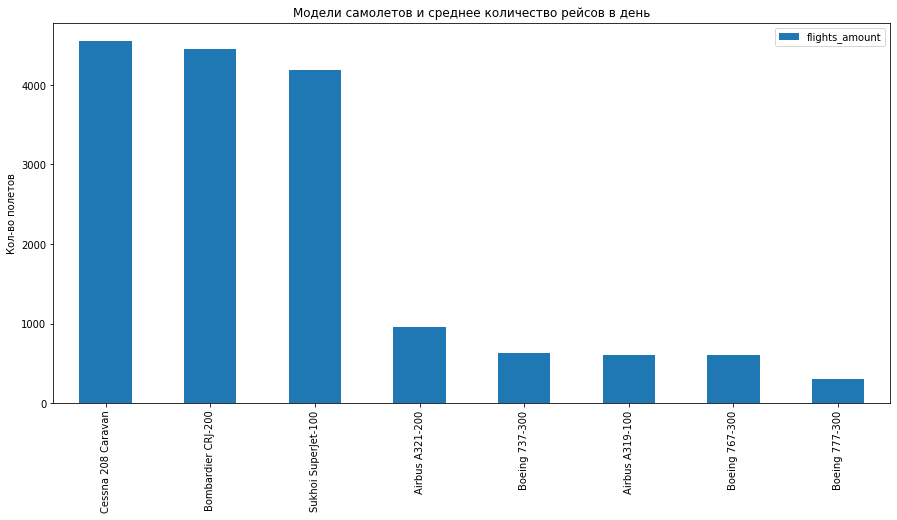

In [6]:
df=df.sort_values('flights_amount', ascending=False)
df.plot(x='model', y='flights_amount', kind='bar', figsize=(15, 7));
plt.title('Модели самолетов и среднее количество рейсов в день')
plt.ylabel('Кол-во полетов')
plt.xlabel('', fontsize=14)
plt.show()

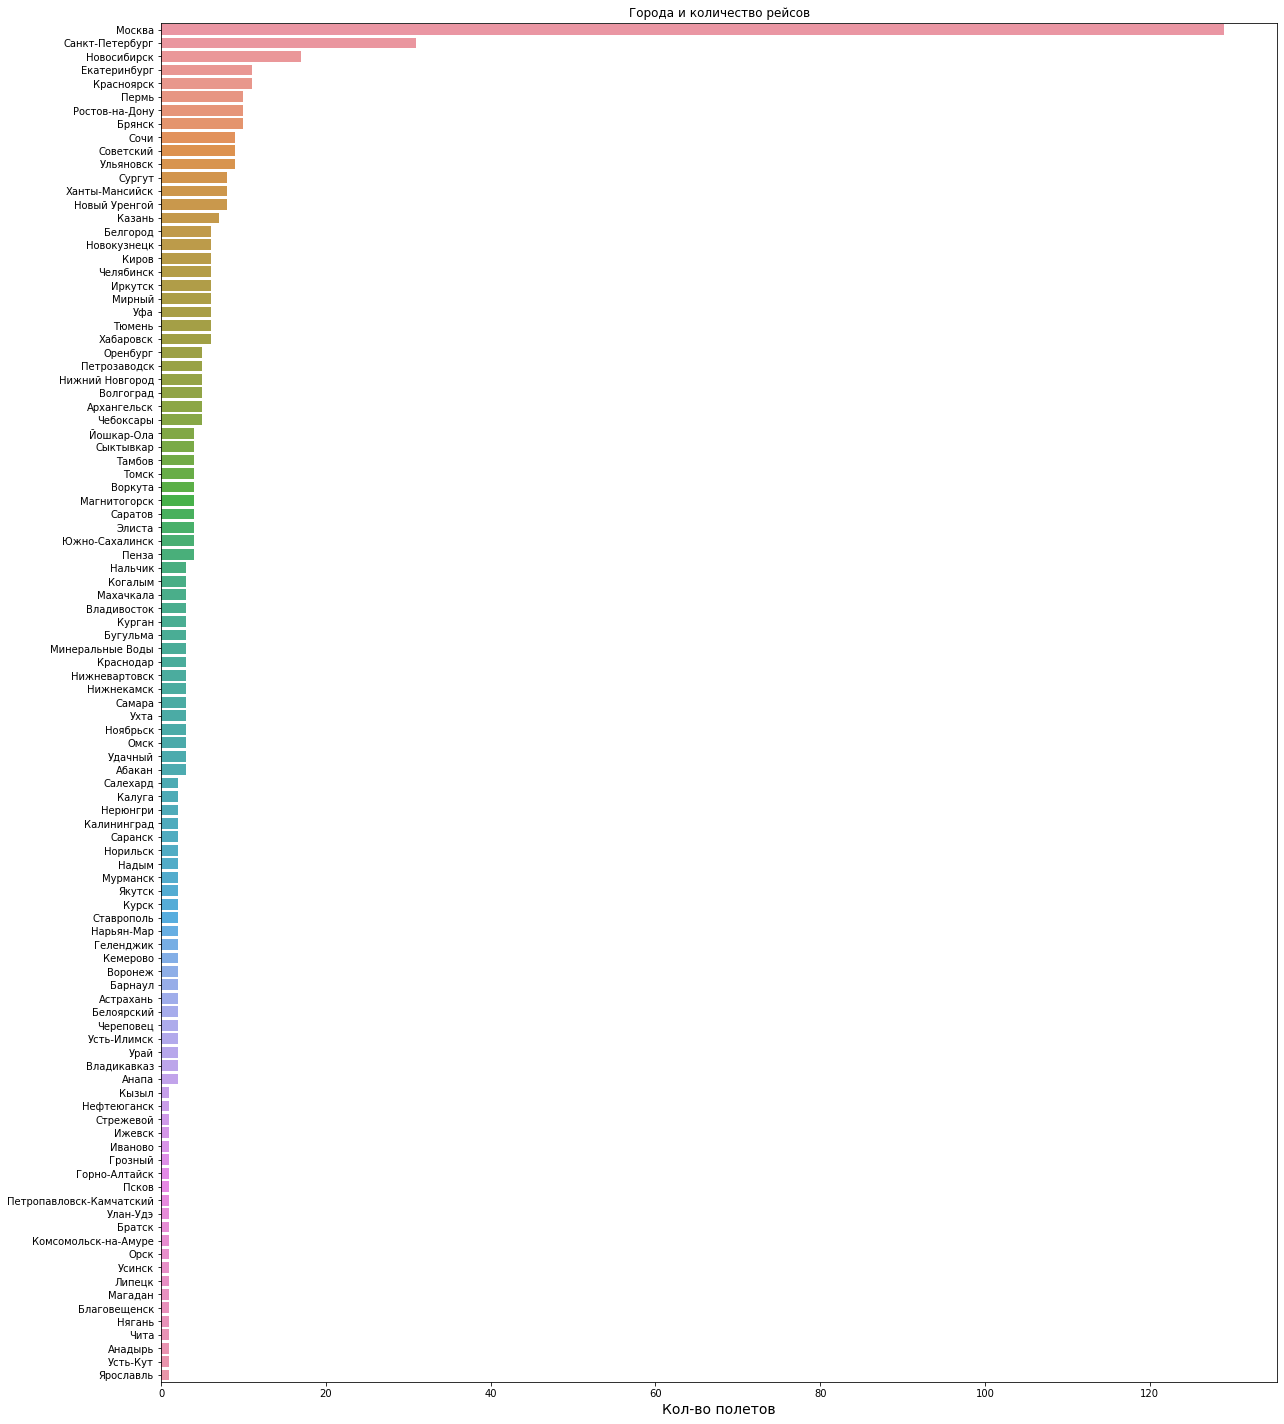

In [9]:
df1=df1.sort_values('average_flights', ascending=False)
plt.figure(figsize=(20, 25))
sns.barplot(x='average_flights', y='city', data=df1)
plt.title('Города и количество рейсов')
plt.ylabel('')
plt.xlabel('Кол-во полетов', fontsize=14)
plt.show()

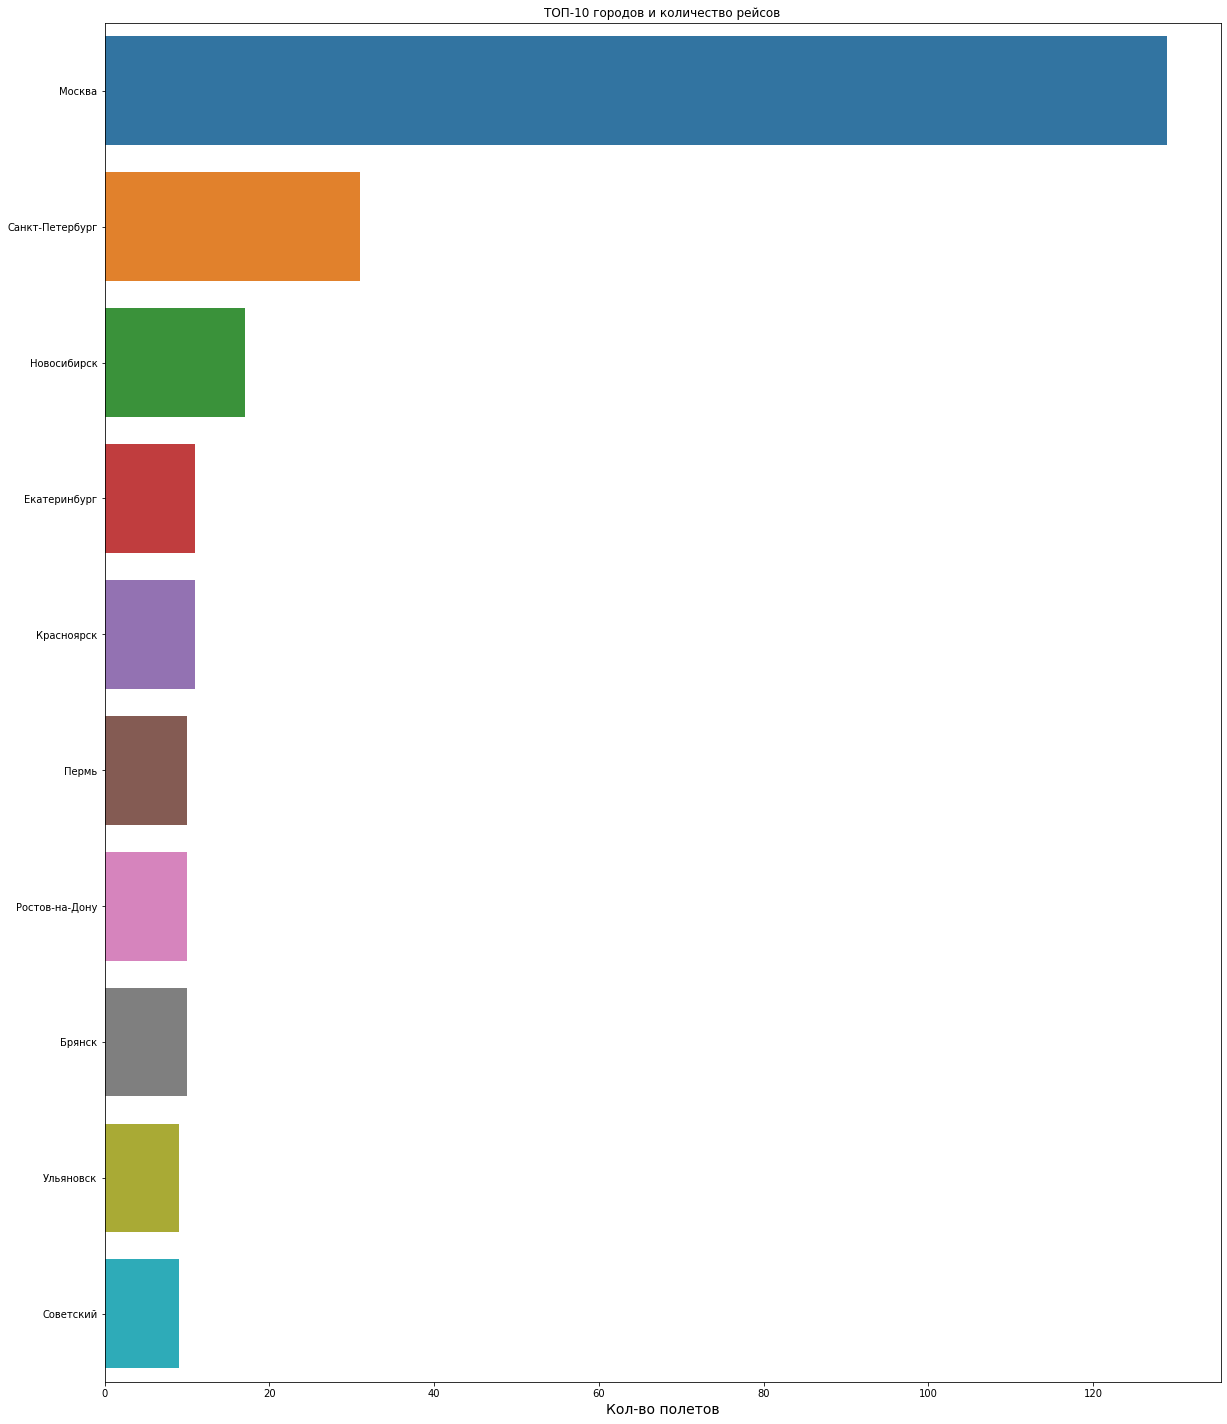

In [10]:
top10=top10.sort_values('average_flights', ascending=False)
plt.figure(figsize=(20, 25))
sns.barplot(x='average_flights', y='city', data=top10)
plt.title('ТОП-10 городов и количество рейсов')

plt.ylabel('')
plt.xlabel('Кол-во полетов', fontsize=14)
plt.show()

Больше всего летают из Москвы и самый популярный самолет в перелетах Cessna 208 Caravan, так мньго полетов на данном самолете потому что это маленький и частный самолет. скорее всего на нем выполняют короткие рейсы из одной точки в другую. Проходят обучение на пилотов